# Exploratory Data Analysis

In [ ]:
#pip (preferred installer program)
#!pip install pandas_profiling

In [ ]:
#!pip install sweetviz

In [1]:
#load the libraries
import pandas as pd
import numpy as np
#import pandas_profiling as pp
#import sweetviz as sv

In [2]:
data=pd.read_csv("D:\\ALL DATA SCIENCE\\Learn Digital\\data_clean.csv")

In [3]:
data

,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,1,41.0,190.0,7.4,67,5,1,2010,67,S
1,2,36.0,118.0,8.0,72,5,2,2010,72,C
2,3,12.0,149.0,12.6,74,5,3,2010,74,PS
3,4,18.0,313.0,11.5,62,5,4,2010,62,S
4,5,NaN,NaN,14.3,56,5,5,2010,56,S
...,...,...,...,...,...,...,...,...,...,...
153,154,41.0,190.0,7.4,67,5,1,2010,67,C
154,155,30.0,193.0,6.9,70,9,26,2010,70,PS
155,156,NaN,145.0,13.2,77,9,27,2010,77,S
156,157,14.0,191.0,14.3,75,9,28,2010,75,S


In [4]:
data=data.iloc[:,1:]

In [5]:
data

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,67,5,1,2010,67,S
1,36.0,118.0,8.0,72,5,2,2010,72,C
2,12.0,149.0,12.6,74,5,3,2010,74,PS
3,18.0,313.0,11.5,62,5,4,2010,62,S
4,NaN,NaN,14.3,56,5,5,2010,56,S
...,...,...,...,...,...,...,...,...,...
153,41.0,190.0,7.4,67,5,1,2010,67,C
154,30.0,193.0,6.9,70,9,26,2010,70,PS
155,NaN,145.0,13.2,77,9,27,2010,77,S
156,14.0,191.0,14.3,75,9,28,2010,75,S


In [6]:
data.describe()

,Ozone,Solar.R,Wind,Day,Year,Temp
count,120.000000,151.000000,158.000000,158.000000,158.0,158.000000
mean,41.583333,185.403974,9.957595,16.006329,2010.0,77.727848
std,32.620709,88.723103,3.511261,8.997166,0.0,9.377877
min,1.000000,7.000000,1.700000,1.000000,2010.0,56.000000
25%,18.000000,119.000000,7.400000,8.000000,2010.0,72.000000
50%,30.500000,197.000000,9.700000,16.000000,2010.0,78.500000
75%,61.500000,257.000000,11.875000,24.000000,2010.0,84.000000
max,168.000000,334.000000,20.700000,31.000000,2010.0,97.000000


In [6]:
#data=data[:,:-3]
del data['Year']
data

,Ozone,Solar.R,Wind,Temp C,Month,Day,Temp,Weather
0,41.0,190.0,7.4,67,5,1,67,S
1,36.0,118.0,8.0,72,5,2,72,C
2,12.0,149.0,12.6,74,5,3,74,PS
3,18.0,313.0,11.5,62,5,4,62,S
4,NaN,NaN,14.3,56,5,5,56,S
...,...,...,...,...,...,...,...,...
153,41.0,190.0,7.4,67,5,1,67,C
154,30.0,193.0,6.9,70,9,26,70,PS
155,NaN,145.0,13.2,77,9,27,77,S
156,14.0,191.0,14.3,75,9,28,75,S


In [8]:
#Data Structure 
print(type(data))
data.shape

<class 'pandas.core.frame.DataFrame'>


(158, 8)

In [7]:
#data types
data.dtypes

Ozone      float64
Solar.R    float64
Wind       float64
Temp C      object
Month       object
Day          int64
Temp         int64
Weather     object
dtype: object

# Data type conversion

In [10]:
data['Month']=pd.to_numeric(data['Month'],errors='coerce')
data['Temp C']=pd.to_numeric(data['Temp C'],errors='coerce')# coerce will introduce NA values for non numeric data in the columns
data['Weather']=data['Weather'].astype('category')           #data['Wind']=data['Wind'].astype('int64')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   Ozone    120 non-null    float64 
 1   Solar.R  151 non-null    float64 
 2   Wind     158 non-null    float64 
 3   Temp C   157 non-null    float64 
 4   Month    157 non-null    float64 
 5   Day      158 non-null    int64   
 6   Temp     158 non-null    int64   
 7   Weather  155 non-null    category
dtypes: category(1), float64(5), int64(2)
memory usage: 9.0 KB


# Handling Missing Values

If the dataset is small, and only 3-5% data is missing from a specific numerical column, then it will be ideal to replace the missing values with either mean or median
- Mean: If the data is normally distributed
- Median: If the data is skewed

If more than 60-70% is missing, then it will be ideal to drop the column, because imputing so much data is neither possible, nor appropriate. 

If data is missing upto 5% to 40%, then used advanced techniques.
Either use linear regression, decision trees, or discretization

In [8]:
#Ozone missing data percentage
(38/158)*100

24.050632911392405

In [9]:
#Solar.R missing data percentage
(7/158)*100

4.430379746835443

In [10]:
data['Solar.R'].skew()

-0.41672688426425836

In [15]:
data['Weather'].mode()

0    S
Name: Weather, dtype: category
Categories (3, object): ['C', 'PS', 'S']

In [16]:
data['Weather'].value_counts()

S     59
C     49
PS    47
Name: Weather, dtype: int64

In [17]:
data.groupby('Weather')['Temp'].mean()

Weather
C     77.734694
PS    76.872340
S     78.067797
Name: Temp, dtype: float64

In [18]:
#The method .copy() is used here so that any changes made in new DataFrame don't get reflected in the original one
data_cleaned=data.copy()
data_cleaned

,Ozone,Solar.R,Wind,Temp C,Month,Day,Temp,Weather
0,41.0,190.0,7.4,67.0,5.0,1,67,S
1,36.0,118.0,8.0,72.0,5.0,2,72,C
2,12.0,149.0,12.6,74.0,5.0,3,74,PS
3,18.0,313.0,11.5,62.0,5.0,4,62,S
4,NaN,NaN,14.3,56.0,5.0,5,56,S
...,...,...,...,...,...,...,...,...
153,41.0,190.0,7.4,67.0,5.0,1,67,C
154,30.0,193.0,6.9,70.0,9.0,26,70,PS
155,NaN,145.0,13.2,77.0,9.0,27,77,S
156,14.0,191.0,14.3,75.0,9.0,28,75,S


# Duplicates

In [19]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
153    False
154    False
155    False
156     True
157    False
Length: 158, dtype: bool

In [11]:
#Print the duplicated rows
data[data.duplicated()]

,Ozone,Solar.R,Wind,Temp C,Month,Day,Temp,Weather
156,14.0,191.0,14.3,75,9,28,75,S


In [12]:
data[data['Solar.R']==191]

,Ozone,Solar.R,Wind,Temp C,Month,Day,Temp,Weather
46,21.0,191.0,14.9,77,6,16,77,PS
150,14.0,191.0,14.3,75,9,28,75,S
156,14.0,191.0,14.3,75,9,28,75,S


In [13]:
#Count of duplicated rows
data[data.duplicated()].shape

(1, 8)

In [14]:
data.shape

(158, 8)

In [15]:
data_cleaned=data.drop_duplicates()

In [25]:
data_cleaned.shape

(157, 8)

In [16]:
data_cleaned[data_cleaned.duplicated()]

,Ozone,Solar.R,Wind,Temp C,Month,Day,Temp,Weather


# Drop columns

In [27]:
data_cleaned[data_cleaned['Temp C']!=data_cleaned['Temp']]

,Ozone,Solar.R,Wind,Temp C,Month,Day,Temp,Weather
10,7.0,NaN,6.9,NaN,5.0,11,74,C


In [38]:
data_cleaned=data_cleaned.drop('Temp C',axis=1)

In [39]:
data_cleaned

,Ozone,Solar,Wind,Month,Day,Temp,Weather
0,41.0,190.0,7.4,5,1,67,S
1,36.0,118.0,8.0,5,2,72,C
2,12.0,149.0,12.6,5,3,74,PS
3,18.0,313.0,11.5,5,4,62,S
4,NaN,NaN,14.3,5,5,56,S
...,...,...,...,...,...,...,...
152,20.0,223.0,11.5,9,30,68,S
153,41.0,190.0,7.4,5,1,67,C
154,30.0,193.0,6.9,9,26,70,PS
155,NaN,145.0,13.2,9,27,77,S


# Rename the columns

In [26]:
#rename the Solar column
data_cleaned = data_cleaned.rename({'Solar.R': 'Solar'}, axis=1)

In [27]:
data_cleaned

,Ozone,Solar,Wind,Temp C,Month,Day,Temp,Weather
0,41.0,190.0,7.4,67,5,1,67,S
1,36.0,118.0,8.0,72,5,2,72,C
2,12.0,149.0,12.6,74,5,3,74,PS
3,18.0,313.0,11.5,62,5,4,62,S
4,NaN,NaN,14.3,56,5,5,56,S
...,...,...,...,...,...,...,...,...
152,20.0,223.0,11.5,68,9,30,68,S
153,41.0,190.0,7.4,67,5,1,67,C
154,30.0,193.0,6.9,70,9,26,70,PS
155,NaN,145.0,13.2,77,9,27,77,S


# Outlier Detection

In [40]:
import matplotlib.pyplot
import seaborn as sns
%matplotlib inline

<AxesSubplot:>

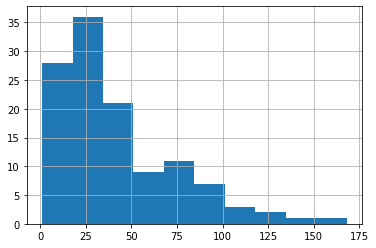

In [41]:
# histogram of Ozone
data_cleaned['Ozone'].hist()

(array([28., 36., 21.,  9., 11.,  7.,  3.,  2.,  1.,  1.]),
 array([  1. ,  17.7,  34.4,  51.1,  67.8,  84.5, 101.2, 117.9, 134.6,
        151.3, 168. ]),
 <BarContainer object of 10 artists>)

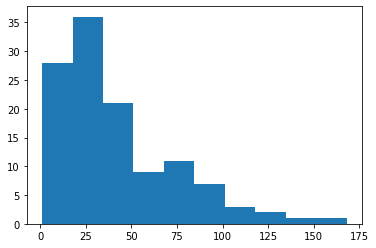

In [42]:
import matplotlib.pyplot as plt
plt.hist(data_cleaned['Ozone'])

<AxesSubplot:>

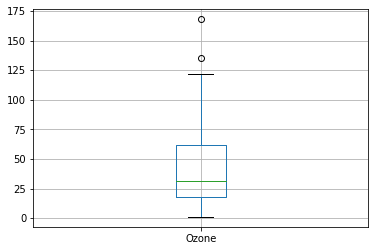

In [43]:
#Box plot
data_cleaned.boxplot(column=['Ozone'])

In [44]:
#Descriptive stat
data_cleaned['Ozone'].describe()

count    119.000000
mean      41.815126
std       32.659249
min        1.000000
25%       18.000000
50%       31.000000
75%       62.000000
max      168.000000
Name: Ozone, dtype: float64

In [45]:
#Interquartile Range
print('Interquartile Range',62-18)

#Upper Limit of Ozone
print('Upper Limit',62+1.5*(62-18))

#Lower Limit of Ozone
print('Lower Limit',18-1.5*(62-18))

Interquartile Range 44
Upper Limit 128.0
Lower Limit -48.0


In [46]:
data['Weather'].value_counts()

S     59
C     49
PS    47
Name: Weather, dtype: int64

<AxesSubplot:>

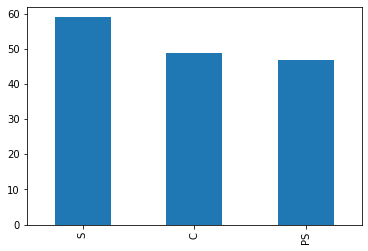

In [47]:
#Bar plot
data['Weather'].value_counts().plot.bar()

# Missing Values and Imputation

In [48]:
import seaborn as sns
cols = data_cleaned.columns 
cols

Index(['Ozone', 'Solar', 'Wind', 'Month', 'Day', 'Temp', 'Weather'], dtype='object')

In [49]:
data_cleaned.isnull().sum()

Ozone      38
Solar       7
Wind        0
Month       0
Day         0
Temp        0
Weather     3
dtype: int64

help(sns.color_palette)

<AxesSubplot:>

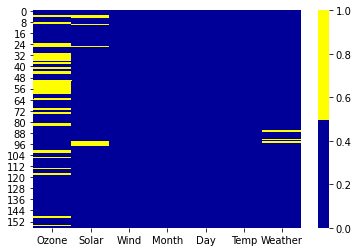

In [50]:
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(data_cleaned[cols].isnull(),
            cmap=sns.color_palette(colours))

In [51]:
data_cleaned.isnull().any(axis=1)

0      False
1      False
2      False
3      False
4       True
       ...  
152    False
153    False
154    False
155     True
157    False
Length: 157, dtype: bool

In [52]:
#To check the rows which have atleast 1 missing data across any column 
data_cleaned[data_cleaned.isnull().any(axis=1)]

,Ozone,Solar,Wind,Month,Day,Temp,Weather
4,NaN,NaN,14.3,5,5,56,S
5,28.0,NaN,14.9,5,6,66,C
9,NaN,194.0,8.6,5,10,69,S
10,7.0,NaN,6.9,5,11,74,C
24,NaN,66.0,16.6,5,25,57,PS
25,NaN,266.0,14.9,5,26,58,C
26,NaN,NaN,8.0,5,27,57,PS
31,NaN,286.0,8.6,6,1,78,S
32,NaN,287.0,9.7,6,2,74,C
33,NaN,242.0,16.1,6,3,67,PS


- Since only about 4.45% data is missing in 'Solar', we can replace the missing value with mean/median depending upon skewness in the data.
- If data is skewed, then replace with median
- If data is normally dstributed, then replace with mean

Also if more than 5% data is missing, then it is NOT ideal to replace with a single value,
we should look for similar cases in the data to impute the missing values.

Suppose we consider 'Solar' column to be helpful in determining the missing values in Ozone, we must bin the Ozone data, and find the mean value of solar grouped by these bins.

But 'Solar' column also has some missing data, so we need to impute those first if we want to use the 'Solar' column to impute missing values in 'Ozone' column.

7
-0.4141167126969295


C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Solar'>

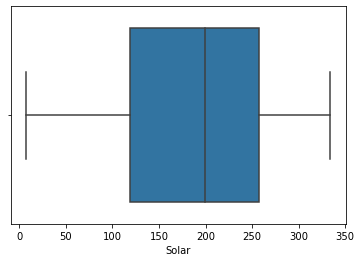

In [54]:
print(data_cleaned['Solar'].isnull().sum())
print(data_cleaned['Solar'].skew())
sns.boxplot(data_cleaned['Solar'])

In [56]:
solar_median=data_cleaned['Solar'].median()
print(solar_median)
solar_mean=data_cleaned['Solar'].mean()
print(solar_mean)

199.0
185.36666666666667


In [57]:
data_cleaned['Solar'] = data_cleaned['Solar'].fillna(solar_median)
data_cleaned['Solar']

0      190.0
1      118.0
2      149.0
3      313.0
4      199.0
       ...  
152    223.0
153    190.0
154    193.0
155    145.0
157    131.0
Name: Solar, Length: 157, dtype: float64

In [59]:
data_cleaned['Solar'].isnull().sum()

0

In [60]:
data_cleaned[data_cleaned['Solar'].isnull()]

,Ozone,Solar,Wind,Month,Day,Temp,Weather


In [61]:
data_cleaned['Ozone'].isnull().sum()

38

In [62]:
len(data_cleaned)

157

In [63]:
((data_cleaned['Ozone'].isnull().sum())/len(data_cleaned))*100

24.203821656050955

In [53]:
data_cleaned['Solar'].describe()

count    158.000000
mean     185.917722
std       86.755676
min        7.000000
25%      127.000000
50%      197.000000
75%      255.000000
max      334.000000
Name: Solar.R, dtype: float64

In [64]:
data_cleaned['Solar_Bin']=pd.cut(x=data_cleaned['Solar'],bins=[0,50,100,150,200,250,300,350], right=True,
                                 labels=['a','b','c','d','e','f','g'])
data_cleaned

,Ozone,Solar,Wind,Month,Day,Temp,Weather,Solar_Bin
0,41.0,190.0,7.4,5,1,67,S,d
1,36.0,118.0,8.0,5,2,72,C,c
2,12.0,149.0,12.6,5,3,74,PS,c
3,18.0,313.0,11.5,5,4,62,S,g
4,NaN,199.0,14.3,5,5,56,S,d
...,...,...,...,...,...,...,...,...
152,20.0,223.0,11.5,9,30,68,S,e
153,41.0,190.0,7.4,5,1,67,C,d
154,30.0,193.0,6.9,9,26,70,PS,d
155,NaN,145.0,13.2,9,27,77,S,c


In [65]:
Ozone_Bins=pd.DataFrame(data_cleaned['Ozone'].groupby(data_cleaned['Solar_Bin']).mean())
Ozone_Bins

,Ozone
Solar_Bin,
a,11.600000
b,30.166667
c,21.181818
d,53.130435
e,59.840000
f,50.115385
g,26.571429


In [66]:
data_cleaned['Ozone'] = data_cleaned['Ozone'].fillna(data_cleaned.groupby('Solar_Bin')['Ozone'].transform('mean'))

In [69]:
data_cleaned['Ozone']

0      41.000000
1      36.000000
2      12.000000
3      18.000000
4      53.130435
         ...    
152    20.000000
153    41.000000
154    30.000000
155    21.181818
157    18.000000
Name: Ozone, Length: 157, dtype: float64

In [70]:
data_cleaned

,Ozone,Solar,Wind,Month,Day,Temp,Weather,Solar_Bin
0,41.000000,190.0,7.4,5,1,67,S,d
1,36.000000,118.0,8.0,5,2,72,C,c
2,12.000000,149.0,12.6,5,3,74,PS,c
3,18.000000,313.0,11.5,5,4,62,S,g
4,53.130435,199.0,14.3,5,5,56,S,d
...,...,...,...,...,...,...,...,...
152,20.000000,223.0,11.5,9,30,68,S,e
153,41.000000,190.0,7.4,5,1,67,C,d
154,30.000000,193.0,6.9,9,26,70,PS,d
155,21.181818,145.0,13.2,9,27,77,S,c


In [71]:
data_cleaned.isnull().sum()

Ozone        0
Solar        0
Wind         0
Month        0
Day          0
Temp         0
Weather      3
Solar_Bin    0
dtype: int64

In [72]:
data_cleaned['Weather'].mode()

0    S
dtype: object

In [76]:
data_cleaned['Weather']=data_cleaned['Weather'].fillna('S')
data_cleaned['Weather'].isnull().sum()

0

In [77]:
data_cleaned.isnull().sum()

Ozone        0
Solar        0
Wind         0
Month        0
Day          0
Temp         0
Weather      0
Solar_Bin    0
dtype: int64

In [78]:
data_cleaned=data_cleaned.drop(['Solar_Bin'],axis=1)
data_cleaned

,Ozone,Solar,Wind,Month,Day,Temp,Weather
0,41.000000,190.0,7.4,5,1,67,S
1,36.000000,118.0,8.0,5,2,72,C
2,12.000000,149.0,12.6,5,3,74,PS
3,18.000000,313.0,11.5,5,4,62,S
4,53.130435,199.0,14.3,5,5,56,S
...,...,...,...,...,...,...,...
152,20.000000,223.0,11.5,9,30,68,S
153,41.000000,190.0,7.4,5,1,67,C
154,30.000000,193.0,6.9,9,26,70,PS
155,21.181818,145.0,13.2,9,27,77,S


In [79]:
data_cleaned.isnull().sum()

Ozone      0
Solar      0
Wind       0
Month      0
Day        0
Temp       0
Weather    0
dtype: int64

In [67]:
data_cleaned.dtypes

Ozone       float64
Solar.R     float64
Wind        float64
Month       float64
Day           int64
Temp          int64
Weather    category
dtype: object

In [68]:
data_cleaned[data_cleaned['Month'].isnull()]

,Ozone,Solar.R,Wind,Month,Day,Temp,Weather
23,32.0,92.0,12.0,NaN,24,61,C


In [69]:
#data_cleaned['Solar'] = data_cleaned['Solar'].fillna(mean)
data_cleaned['Month'] = data_cleaned['Month'].fillna(5)

In [70]:
data_cleaned.isnull().sum()

Ozone      0
Solar.R    0
Wind       0
Month      0
Day        0
Temp       0
Weather    0
dtype: int64

In [71]:
data_cleaned.groupby('Month')['Temp'].mean()

Month
5.0    65.593750
6.0    79.100000
7.0    83.903226
8.0    83.967742
9.0    76.617647
Name: Temp, dtype: float64

In [72]:
data_cleaned

,Ozone,Solar.R,Wind,Month,Day,Temp,Weather
0,41.000000,190.0,7.4,5.0,1,67,S
1,36.000000,118.0,8.0,5.0,2,72,C
2,12.000000,149.0,12.6,5.0,3,74,PS
3,18.000000,313.0,11.5,5.0,4,62,S
4,51.500000,197.0,14.3,5.0,5,56,S
...,...,...,...,...,...,...,...
153,41.000000,190.0,7.4,5.0,1,67,C
154,30.000000,193.0,6.9,9.0,26,70,PS
155,21.181818,145.0,13.2,9.0,27,77,S
156,14.000000,191.0,14.3,9.0,28,75,S


In [ ]:
#data[data["month"=="May"]]=5
#data_cleaned=data_cleaned.replace("May",5)

In [ ]:
#data1['Month']=pd.to_numeric(data1['Month'],errors='coerce')

In [ ]:
#data1['Month'].dtype

# Scatter plot and Correlation analysis

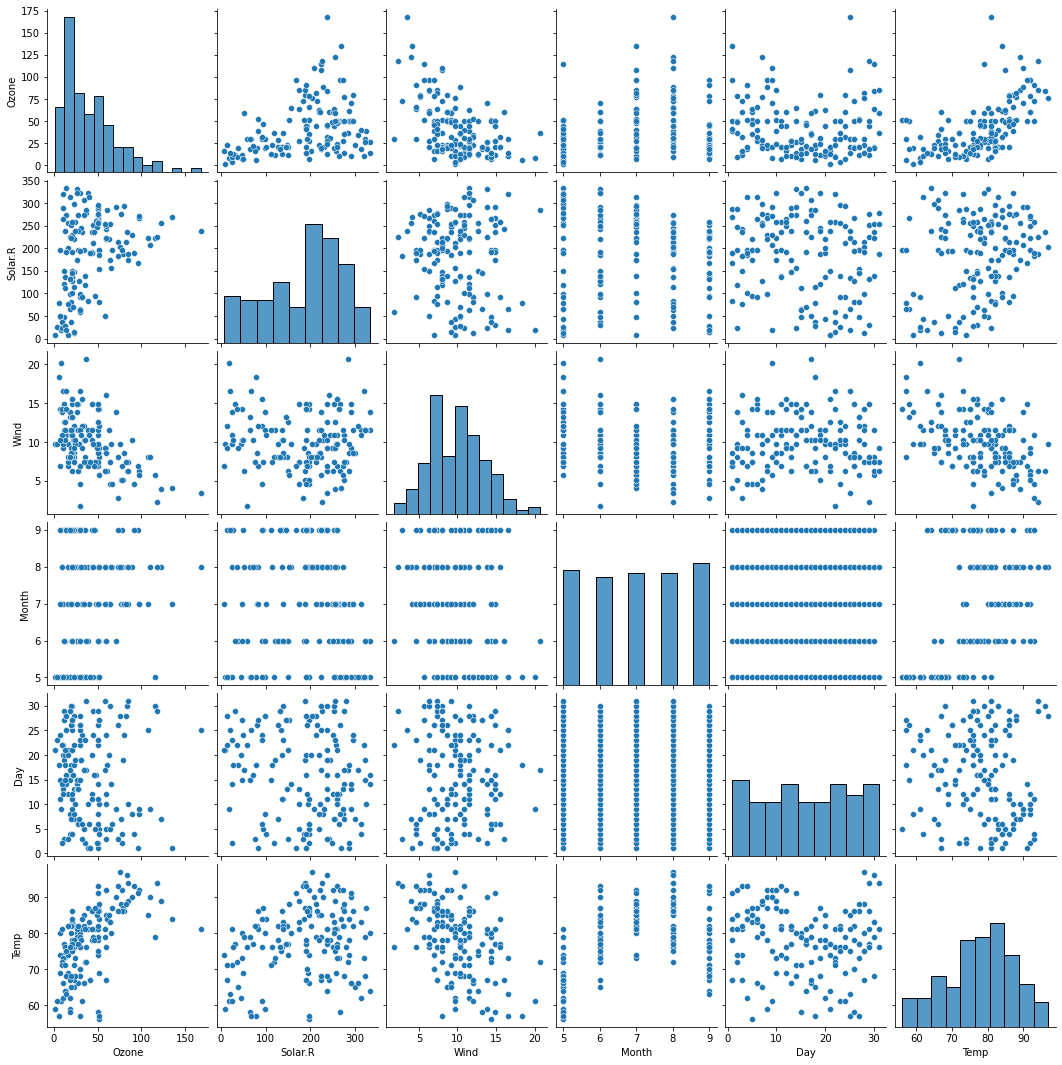

In [73]:
# Seaborn visualization library
import seaborn as sns
# Create the default pairplot
sns.pairplot(data_cleaned)

In [74]:
#Correlation
data_cleaned.corr()

#Correlation is always between -1 to +1
#-1 to -0.5 & +0.5 to +1 is strong correlationship
#-0.5 to 0 & 0 to 0.5 is moderate correlationship
#Values very close to 0 indicate no correlationship

,Ozone,Solar.R,Wind,Month,Day,Temp
Ozone,1.000000,0.372953,-0.510828,0.114657,-0.091081,0.589637
Solar.R,0.372953,1.000000,-0.056697,-0.082257,-0.154095,0.257369
Wind,-0.510828,-0.056697,1.000000,-0.157623,0.040151,-0.441247
Month,0.114657,-0.082257,-0.157623,1.000000,0.052646,0.402942
Day,-0.091081,-0.154095,0.040151,0.052646,1.000000,-0.124538
Temp,0.589637,0.257369,-0.441247,0.402942,-0.124538,1.000000


# Transformations

#### Dummy Variable

In [75]:
data_cleaned.iloc[0:20,:]

,Ozone,Solar.R,Wind,Month,Day,Temp,Weather
0,41.0,190.0,7.4,5.0,1,67,S
1,36.0,118.0,8.0,5.0,2,72,C
2,12.0,149.0,12.6,5.0,3,74,PS
3,18.0,313.0,11.5,5.0,4,62,S
4,51.5,197.0,14.3,5.0,5,56,S
5,28.0,197.0,14.9,5.0,6,66,C
6,23.0,299.0,8.6,5.0,7,65,PS
7,19.0,99.0,13.8,5.0,8,59,C
8,8.0,19.0,20.1,5.0,9,61,PS
9,51.5,194.0,8.6,5.0,10,69,S


In [76]:
#Creating dummy variable for Weather column
data_cleaned=pd.get_dummies(data_cleaned,columns=['Weather'])

In [77]:
data_cleaned
#data_cleaned=data_cleaned.drop(['Weather'],axis=1)

,Ozone,Solar.R,Wind,Month,Day,Temp,Weather_C,Weather_PS,Weather_S
0,41.000000,190.0,7.4,5.0,1,67,0,0,1
1,36.000000,118.0,8.0,5.0,2,72,1,0,0
2,12.000000,149.0,12.6,5.0,3,74,0,1,0
3,18.000000,313.0,11.5,5.0,4,62,0,0,1
4,51.500000,197.0,14.3,5.0,5,56,0,0,1
...,...,...,...,...,...,...,...,...,...
153,41.000000,190.0,7.4,5.0,1,67,1,0,0
154,30.000000,193.0,6.9,9.0,26,70,0,1,0
155,21.181818,145.0,13.2,9.0,27,77,0,0,1
156,14.000000,191.0,14.3,9.0,28,75,0,0,1


In [78]:
data_cleaned.dtypes

Ozone         float64
Solar.R       float64
Wind          float64
Month         float64
Day             int64
Temp            int64
Weather_C       uint8
Weather_PS      uint8
Weather_S       uint8
dtype: object

In [ ]:
data_cleaned=data_cleaned.dropna()

In [ ]:
data_cleaned['Solar_Bin']=pd.cut(x=data_cleaned['Solar'],bins=[50,100,150,200,250,300,350], right=True,
                                 labels=[0,1,2,3,4,5])
data_cleaned

#### Normalization of the data

In [79]:
data_cleaned

,Ozone,Solar.R,Wind,Month,Day,Temp,Weather_C,Weather_PS,Weather_S
0,41.000000,190.0,7.4,5.0,1,67,0,0,1
1,36.000000,118.0,8.0,5.0,2,72,1,0,0
2,12.000000,149.0,12.6,5.0,3,74,0,1,0
3,18.000000,313.0,11.5,5.0,4,62,0,0,1
4,51.500000,197.0,14.3,5.0,5,56,0,0,1
...,...,...,...,...,...,...,...,...,...
153,41.000000,190.0,7.4,5.0,1,67,1,0,0
154,30.000000,193.0,6.9,9.0,26,70,0,1,0
155,21.181818,145.0,13.2,9.0,27,77,0,0,1
156,14.000000,191.0,14.3,9.0,28,75,0,0,1


In [80]:
#Normalization of the data
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

In [81]:
data_cleaned.dtypes

Ozone         float64
Solar.R       float64
Wind          float64
Month         float64
Day             int64
Temp            int64
Weather_C       uint8
Weather_PS      uint8
Weather_S       uint8
dtype: object

In [82]:
array1=data_cleaned.values

In [83]:
array1

array([[ 41.        , 190.        ,   7.4       , ...,   0.        ,
          0.        ,   1.        ],
       [ 36.        , 118.        ,   8.        , ...,   1.        ,
          0.        ,   0.        ],
       [ 12.        , 149.        ,  12.6       , ...,   0.        ,
          1.        ,   0.        ],
       ...,
       [ 21.18181818, 145.        ,  13.2       , ...,   0.        ,
          0.        ,   1.        ],
       [ 14.        , 191.        ,  14.3       , ...,   0.        ,
          0.        ,   1.        ],
       [ 18.        , 131.        ,   8.        , ...,   1.        ,
          0.        ,   0.        ]])

In [86]:
scaler = MinMaxScaler(feature_range=(0,1))
rescaledX = scaler.fit_transform(array1[:,0:])

In [87]:
rescaledX

array([[0.23952096, 0.55963303, 0.3       , ..., 0.        , 0.        ,
        1.        ],
       [0.20958084, 0.33944954, 0.33157895, ..., 1.        , 0.        ,
        0.        ],
       [0.06586826, 0.43425076, 0.57368421, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.12084921, 0.42201835, 0.60526316, ..., 0.        , 0.        ,
        1.        ],
       [0.07784431, 0.56269113, 0.66315789, ..., 0.        , 0.        ,
        1.        ],
       [0.10179641, 0.37920489, 0.33157895, ..., 1.        , 0.        ,
        0.        ]])

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
rescaledX = scaler.fit_transform(array1[:,0:5])

#transformed data
set_printoptions(precision=2)
print(rescaledX[0:5,:])
print(rescaledX)

In [ ]:
data_cleaned

In [89]:
# Standardize data (0 mean, 1 stdev)
from sklearn.preprocessing import StandardScaler

In [90]:
scaler = StandardScaler().fit(array1)
rescaledX = scaler.transform(array1)

# summarize transformed data
#set_printoptions(precision=2)
#print(rescaledX[0:5,:])

In [91]:
rescaledX

array([[ 0.  ,  0.05, -0.73, ..., -0.67, -0.65,  1.24],
       [-0.17, -0.79, -0.56, ...,  1.49, -0.65, -0.8 ],
       [-0.99, -0.43,  0.75, ..., -0.67,  1.54, -0.8 ],
       ...,
       [-0.67, -0.47,  0.93, ..., -0.67, -0.65,  1.24],
       [-0.92,  0.06,  1.24, ..., -0.67, -0.65,  1.24],
       [-0.78, -0.64, -0.56, ...,  1.49, -0.65, -0.8 ]])

# Speed up the EDA process

In [ ]:
import pandas_profiling as pp
EDA_report= pp.ProfileReport(data)
EDA_report
EDA_report.to_file(output_file='report.html')

In [ ]:
sweet_report = sv.analyze(data)
sweet_report.show_html('weather_report.html')